In [1]:
import pathlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

AOC_DIR = pathlib.Path('.')

# Day 1 part 1
How many times does the depth increase?

In [2]:
with (AOC_DIR / 'puzzle_input1.txt').open() as f:
  puzzle_input1 = list(f)

In [3]:
len(puzzle_input1)

2000

In [4]:
puzzle_input1_ints = [int(depth) for depth in puzzle_input1]

In [5]:
len(puzzle_input1_ints)

2000

In [6]:
np.sum(np.diff(puzzle_input1_ints) > 0)

1462

In [7]:
np.diff(puzzle_input1_ints)[:10]

array([  7, -13,   6,  13,  13,   3,   7,   3,  18,  18])

In [8]:
puzzle_input1_ints[:10]

[122, 129, 116, 122, 135, 148, 151, 158, 161, 179]

In [9]:
np.diff(puzzle_input1_ints)[-10:]

array([ -4,  26,  -4,   3, -24,   5,  -6,  28,  10,  31])

In [10]:
puzzle_input1_ints[-10:]

[6563, 6589, 6585, 6588, 6564, 6569, 6563, 6591, 6601, 6632]

In [11]:
# check correct answer is 1462
assert np.sum(np.diff(puzzle_input1_ints) > 0) == 1462

# Day 1 part 2

Try this 2 ways, with Pandas `.rolling` function and with a custom Rolling window function using numpy.

In [12]:
def moving_window(x, window):
    m = window - 1
    z = 0
    for n in range(window):
        z += np.roll(x, -n)
    return z[:-m]

In [13]:
puzzle_input1_series = pd.Series(puzzle_input1_ints)

In [14]:
roll_win_depths = puzzle_input1_series.rolling(3).sum().dropna().values
roll_win_depths[10:]

array([  582.,   595.,   608., ..., 19723., 19755., 19824.])

In [15]:
move_win_depths = moving_window(puzzle_input1_ints, 3)
move_win_depths[:10]

array([367, 367, 373, 405, 434, 457, 470, 498, 537, 574])

In [16]:
len(roll_win_depths)

1998

In [17]:
len(move_win_depths)

1998

In [18]:
move_win_depths[-10:]

array([19693, 19719, 19737, 19762, 19737, 19721, 19696, 19723, 19755,
       19824])

In [19]:
roll_win_depths[-10:]

array([19693., 19719., 19737., 19762., 19737., 19721., 19696., 19723.,
       19755., 19824.])

In [20]:
np.sum(np.diff(roll_win_depths) > 0)

1497

In [21]:
np.sum(np.diff(move_win_depths) > 0)

1497

In [22]:
# check correct answer is 1497
assert np.sum(np.diff(move_win_depths) > 0) == 1497

# Day 2 Part 1

In [23]:
with (AOC_DIR / 'puzzle_input2.txt').open() as f:
  puzzle_input2 = list(f)

In [24]:
horizontal, depth = 0, 0
for command, x in (commandx.split() for commandx in puzzle_input2):
  x = int(x)
  if command == 'forward': horizontal += x
  elif command == 'down': depth += x
  elif command == 'up': depth -= x
  else: pass
horizontal, depth, horizontal*depth

(1832, 1172, 2147104)

In [25]:
# check correct answer is 2147104
assert horizontal*depth == 2147104

# Day 2 part 2

In [26]:
horizontal, depth, aim = 0, 0, 0
for command, x in (commandx.split() for commandx in puzzle_input2):
  x = int(x)
  if command == 'forward':
    horizontal += x
    depth += (x*aim)
  elif command == 'down': aim += x
  elif command == 'up': aim -= x
  else: pass
horizontal, depth, aim, horizontal*depth

(1832, 1116059, 1172, 2044620088)

In [27]:
# check correct answer is 2044620088
assert horizontal*depth == 2044620088

# Day 3 part 1

In [28]:
with (AOC_DIR / 'puzzle_input3.txt').open() as f:
  puzzle_input3 = list(f)

In [29]:
gamma_rate, epsilon_rate = '', ''
for position in zip(*puzzle_input3):
  print("".join(position))
  bits = sum(int(b) for b in position)
  print(f'length = {len(position)}, common bits = {bits}')
  if 2*bits > len(position):
    gamma_rate += '1'
    epsilon_rate += '0'
  else:
    gamma_rate += '0'
    epsilon_rate += '1'

0100011001111100011000101100000101011010010101000011110001110100101010001111110111101100100110010110111000001111011001000001000100001001100110101001110010001001111111001010010010100000111001101110100110100011100000100011101000111011000010100001010010000101010010111110101001001100001100011010110011011001111001110111010001000111011011100100110110100110111101010001011100101101010001110000011100110000100010011100001000100101110101010110001000010100010111100010011100001011101110110000010111111010000010101011001010010010010001100000111011100010110000011100101010001101111011010110110001000111101111111011011101000101111000111111000010101001001001001000001111101001011001111111010111000010111001010110110111011011000011111010111010110010011001100010100011000111011011100100100001100101111011010100011010001110010011000000000010001111111011000101100011101111001101010111010011010101000110100000010110110111101000010111101100100001101011000000111011001011100101111100100011101100010011001101011100011110

In [30]:
"".join(gamma_rate)

'001100010000'

In [31]:
"".join(epsilon_rate)

'110011101111'

In [32]:
gamma_rate = int(gamma_rate, 2)
epsilon_rate = int(epsilon_rate, 2)
gamma_rate * epsilon_rate

2595824

In [33]:
# check correct answer is 2595824
assert gamma_rate * epsilon_rate == 2595824

# Day 3 part 2

In [34]:
numbers = np.array(puzzle_input3)
num_inputs = len(puzzle_input3)
o2_idx = np.ones(num_inputs).astype(bool)
co2_idx = np.ones(num_inputs).astype(bool)
num_o2 = sum(o2_idx)
num_co2 = sum(co2_idx)
for position in zip(*puzzle_input3):
  idx = np.array(position, int).astype(bool)

  # search for o2 numbers
  if num_o2 > 1:
    o2_positions = np.array(position)[o2_idx]
    o2_bits = sum(int(b) for b in o2_positions)
    if 2*o2_bits >= num_o2:
      o2_idx &= idx
    else:
      o2_idx &= ~idx

  # search for co2 numbers
  if num_co2 > 1:
    co2_positions = np.array(position)[co2_idx]
    co2_bits = sum(int(b) for b in co2_positions)  
    if 2*co2_bits >= num_co2:
      co2_idx &= ~idx
    else:
      co2_idx &= idx

  num_o2 = sum(o2_idx)
  num_co2 = sum(co2_idx)
  print(num_o2, num_co2)

o2_gen_numbers = numbers[o2_idx]
co2_scrub_numbers = numbers[co2_idx]
o2_gen_numbers, co2_scrub_numbers

506 494
263 247
133 119
69 51
35 24
20 11
12 5
7 1
5 1
3 1
2 1
1 1


(array(['001100001101\n'], dtype='<U13'),
 array(['101010101110\n'], dtype='<U13'))

In [35]:
o2_gen_rate = int(o2_gen_numbers[0], 2)
co2_scrub_rate = int(co2_scrub_numbers[0], 2)
o2_gen_rate, co2_scrub_rate, o2_gen_rate*co2_scrub_rate

(781, 2734, 2135254)

In [36]:
# check correct answer is 2135254
assert o2_gen_rate*co2_scrub_rate == 2135254

# Day 4 part 1

In [37]:
puzzle_input4 = {}
with (AOC_DIR / 'puzzle_input4.txt').open() as f:
  # the first line are the bingo numbers
  puzzle_input4['numbers'] = [int(_) for _ in f.readline().split(',')]
  puzzle_input4['grids'] = []
  # the bingo grids are separated by newlines except the EOF
  line = f.readline()
  while line == '\n':
    grid = []
    line = f.readline()
    while line.strip():
      grid.append([int(_) for _ in line.split()])
      line = f.readline()
    puzzle_input4['grids'].append(np.array(grid))

In [38]:
bingo = False
bingo_idx = [np.zeros_like(g) for g in puzzle_input4['grids']]
for number in puzzle_input4['numbers']:
  for k, grid in enumerate(puzzle_input4['grids']):
    bingo_idx[k] |= (grid == number)
    if (any(bingo_idx[k].sum(axis=0) == 5)
        or any(bingo_idx[k].sum(axis=1) == 5)):
      bingo = True
      break
  if bingo: break
print(f'bingo winner: grid = {k+1}, number = {number}')

bingo winner: grid = 74, number = 42


In [39]:
grid_sum = puzzle_input4['grids'][k][~bingo_idx[k].astype(bool)].sum()
grid_sum*number

32844

In [40]:
puzzle_input4['grids'][k]

array([[26, 89, 27, 47, 91],
       [15,  9, 18, 62, 28],
       [31, 96, 42, 81, 86],
       [11, 52, 20, 93, 38],
       [83, 64, 39,  1, 60]])

In [41]:
bingo_idx[k]

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [42]:
# check correct answer is 32844
assert grid_sum*number == 32844

# Day 4 part 2

In [43]:
bingo = np.zeros(len(puzzle_input4['grids'])).astype(bool)
bingo_idx = [np.zeros_like(g) for g in puzzle_input4['grids']]
for number in puzzle_input4['numbers']:
  for k, grid in enumerate(puzzle_input4['grids']):
    bingo_idx[k] |= (grid == number)
    if (any(bingo_idx[k].sum(axis=0) == 5)
        or any(bingo_idx[k].sum(axis=1) == 5)):
      bingo[k] = True
      if bingo.all(): break
  if bingo.all(): break
print(f'last bingo winner: grid = {k+1}, number = {number}')

last bingo winner: grid = 66, number = 20


In [44]:
puzzle_input4['grids'][k]

array([[85, 64, 44, 39, 57],
       [90, 30, 15, 35, 54],
       [78, 89, 55, 99, 12],
       [80, 96, 20, 50, 45],
       [56, 10, 71, 59, 17]])

In [45]:
bingo_idx[k]

array([[1, 1, 0, 1, 1],
       [1, 0, 1, 1, 1],
       [1, 1, 1, 0, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0]])

In [46]:
grid_sum = puzzle_input4['grids'][k][~bingo_idx[k].astype(bool)].sum()
grid_sum*number

4920

In [47]:
# check answer is 4920
assert grid_sum*number == 4920

# day 5 part 1
Hydrothermal venture

In [48]:
# read in pairs of points in format x1,y1 -> x2,y2
puzzle_input5 = []
with (AOC_DIR / 'puzzle_input5.txt').open() as f:
  puzzle_input5 = np.array(
      [[xy.split(',') for xy in pt.split('->')] for pt in f],
      dtype=int)

In [49]:
# some useful numbers to understand the dimensions of the input
x1y1 = puzzle_input5[:, 0, :]  # all the first point coords
x2y2 = puzzle_input5[:, 1, :]  # all the second point coords
xpts = puzzle_input5[:, :, 0]  # all the x's
ypts = puzzle_input5[:, :, 1]  # all the y's

In [50]:
# find the size of the diagram
xmax = xpts.max()
ymax = ypts.max()
xmax, ymax

(989, 990)

In [51]:
# off by one! if a max dimension is 990 and min is zero, then it's 991 long!
diagram = np.zeros((xmax+1, ymax+1))
diagram.shape

(990, 991)

In [52]:
# DEMO: find where x1=x2 or y1=y2
x1y1[:9] == x2y2[:9]

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [ True, False],
       [ True, False],
       [ True, False],
       [False, False],
       [False,  True]])

In [53]:
# DEMO: show that xpts or ypts are matching?
puzzle_input5[:9].T

array([[[556, 337, 786, 977, 544, 539, 364, 282, 536],
        [341, 782, 117, 199, 544, 539, 364, 892, 158]],

       [[286, 201, 780, 864, 127, 471, 765, 325, 941],
        [ 71, 646, 111,  86, 144, 972, 285, 935, 941]]])

In [54]:
# get indices of lines with either matching xpts or ypts
pts_idx = np.any(x1y1 == x2y2, axis=1)

In [55]:
# DEMO: show that we have only vertical or horizontal lines
puzzle_input5[pts_idx, :, :][:4]

array([[[544, 127],
        [544, 144]],

       [[539, 471],
        [539, 972]],

       [[364, 765],
        [364, 285]],

       [[536, 941],
        [158, 941]]])

In [56]:
for line in puzzle_input5[pts_idx, :, :]:
  # vertical lines
  if line[0, 0] == line[1, 0]:
    xpt = line[0, 0]
    for ypt in range(line[:, 1].min(), 1+line[:, 1].max()):
      diagram[xpt, ypt] += 1
  # horizontal lines
  if line[0, 1] == line[1, 1]:
    ypt = line[1, 1]
    for xpt in range(line[:, 0].min(), 1+line[:, 0].max()):
      diagram[xpt, ypt] += 1

In [57]:
diagram.max()

4.0

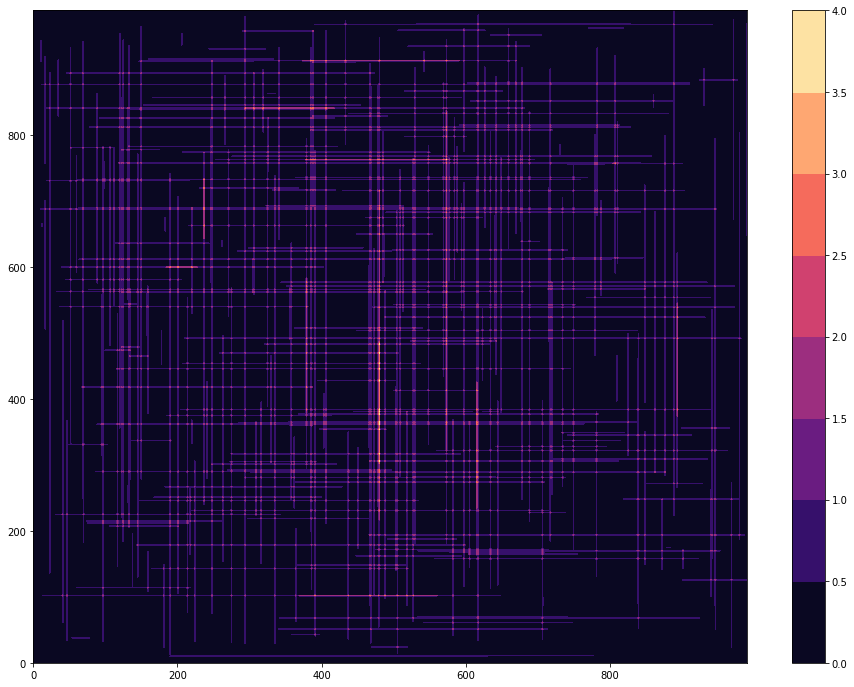

In [58]:
plt.figure(figsize=(16, 12))
plt.contourf(diagram, cmap='magma')
plt.colorbar()

In [59]:
[np.sum(diagram == _) for _ in range(5)]

[884773, 91172, 4822, 308, 15]

In [60]:
np.sum(diagram >= 2)

5145

In [61]:
# check answer is 5145
assert np.sum(diagram >= 2) == 5145

# Day 5 part 2
including diagonal lines at 45-degrees

In [62]:
# get indices of diagonal sets of pts
# which are pairs with (y1 - x1) == (y2 - x2)
# EG: (3 - 3) = (2 - 2) = (1 - 1) = 0
diag_pts_idx = np.diff(x1y1) == np.diff(x2y2)

# the example shows a pair with (x1 == y1) and (x2 == y2) like this:
#   diag_pts_idx = np.all(xpts == ypts, axis=1)
# but there's only one pair (10, 10) -> (989, 989) like that

In [63]:
diag_lines = puzzle_input5[diag_pts_idx.squeeze(), :, :]
# there are many pairs, but they are not all  (r, r) -> (s, s) pairs!
diag_lines[-15:-10]

array([[[986, 827],
        [213,  54]],

       [[816, 483],
        [620, 287]],

       [[397, 210],
        [988, 801]],

       [[ 22,  11],
        [982, 971]],

       [[ 10,  10],
        [989, 989]]])

In [64]:
for diag_line in diag_lines:
  diag_diff = np.diff(diag_line[0]).squeeze()
  for diag_pt in range(diag_line[:, 0].min(), 1+diag_line[:, 0].max()):
    diagram[diag_pt, diag_pt+diag_diff] += 1

In [65]:
# get indices of CROSS diagonal sets of pts
# which are pairs with (x1 + y1) == (x2 + y2)
# EG: 9+7 = 8+8 = 7+9 = 16
xdiag_pts_idx = x1y1.sum(axis=1) == x2y2.sum(axis=1)

# the example shows a pair with (x1 == y2) and (x2 == y1) like this:
#   xdiag_pts_idx = np.all(x1y1 == np.roll(x2y2, 1, axis=1), axis=1)
# but there's only one pair (21, 853) -> (853, 21) like that

In [66]:
xdiag_lines = puzzle_input5[xdiag_pts_idx, :, :]
# there are many pairs, but they are not all  (r, s) -> (s, r) pairs!
xdiag_lines[35:40]

array([[[871, 242],
        [474, 639]],

       [[319, 738],
        [945, 112]],

       [[ 21, 853],
        [853,  21]],

       [[395, 623],
        [217, 801]],

       [[887, 212],
        [217, 882]]])

In [67]:
for xdiag_line in xdiag_lines:
  xdiag_tot = xdiag_line[0].sum()
  for xdiag_pt in range(xdiag_line[:, 0].min(), 1+xdiag_line[:, 0].max()):
    diagram[xdiag_pt, xdiag_tot-xdiag_pt] += 1

In [68]:
diagram.max()

5.0

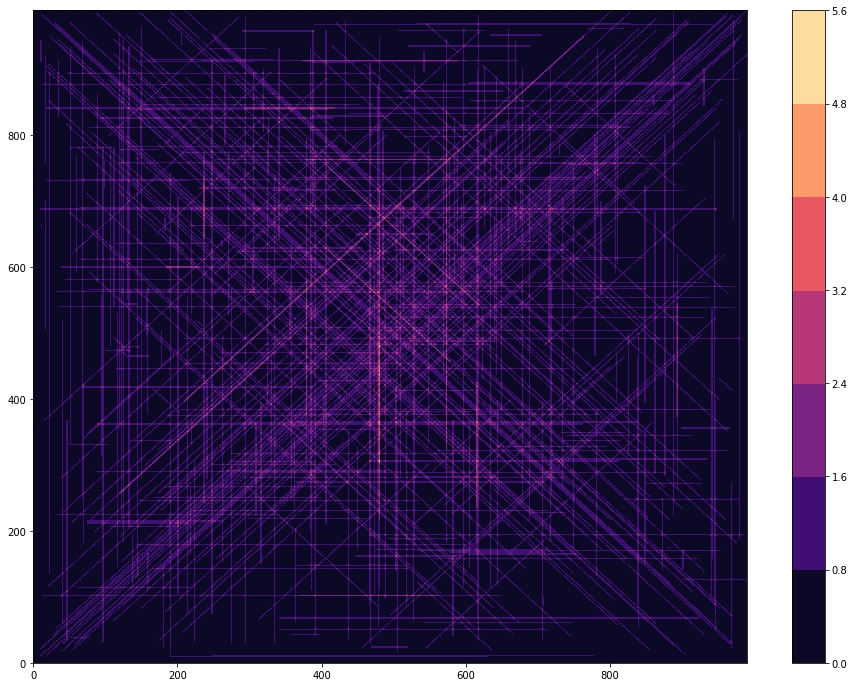

In [69]:
plt.figure(figsize=(16, 12))
plt.contourf(diagram, cmap='magma')
plt.colorbar()

In [70]:
[np.sum(diagram == _) for _ in range(6)]

[817108, 147464, 15179, 1229, 104, 6]

In [71]:
np.sum(diagram >= 2)

16518

In [72]:
# check answer is 16518
assert np.sum(diagram >= 2) == 16518

# Day 6 part 1
Lantern Fish

In [73]:
with (AOC_DIR / 'puzzle_input6.txt').open() as f:
  puzzle_input6 = np.array(f.read().split(','), int)
puzzle_input6.size

300

In [74]:
NDAYS = 80
lanternfish = np.copy(puzzle_input6)
population = [lanternfish]
for day in range(NDAYS):
  # Each day, a 0 becomes a 6 and adds a new 8 to the end of the list, while
  # each other number decreases by 1 if it was present at the start of the day.
  lanternfish = lanternfish - 1  # creates a copy
  new_fish = np.sum(lanternfish < 0)
  if new_fish > 0:
    lanternfish = np.append(
        np.where(lanternfish < 0, 6, lanternfish), [8]*new_fish)
  population.append(lanternfish)

In [75]:
population[-1].size

377263

In [76]:
# check answer is 377263
assert population[-1].size == 377263

# Day 6 part 2

In [77]:
INIT_STATE = np.array([3, 4, 3, 1, 2], int)
NEW_STATE = 8
TIMER = 6


def simulate_lanternfish(init_state, ndays):
  lanternfish = init_state.tolist()
  # states, counts = np.unique(init_state, return_counts=True)
  states = [lanternfish.count(state) for state in range(-1, NEW_STATE+1)]
  for day in range(ndays):
    states = np.roll(states, -1)
    states[NEW_STATE+1] += states[0]
    states[TIMER+1] += states[0]
    states[0] = 0

  return sum(states)


assert simulate_lanternfish(INIT_STATE, 18) == 26
assert simulate_lanternfish(INIT_STATE, 80) == 5934
tot_fish = simulate_lanternfish(INIT_STATE, 256)
assert tot_fish == 26984457539
tot_fish

26984457539

In [78]:
%timeit simulate_lanternfish(INIT_STATE, 256)

100 loops, best of 5: 4.61 ms per loop


In [79]:
tot_fish = simulate_lanternfish(puzzle_input6, 80)
assert tot_fish == 377263
tot_fish

377263

In [80]:
%timeit simulate_lanternfish(puzzle_input6, 80)

1000 loops, best of 5: 1.49 ms per loop


In [81]:
simulate_lanternfish(puzzle_input6, 256)

1695929023803

# Day 7 part 1
Crab submarine fuel consumption

In [82]:
with (AOC_DIR / 'puzzle_input7.txt').open() as f:
  puzzle_input7 = np.array(f.read().split(','), int)
puzzle_input7.size

1000

In [83]:
TEST_INPUT7 = np.array([16, 1, 2, 0, 4, 2, 7, 1, 2, 14])

In [84]:
TEST_INPUT7.mean()

4.9

In [85]:
np.median(TEST_INPUT7)

2.0

In [86]:
puzzle_input7_median = np.median(puzzle_input7).astype(int)
puzzle_input7_median

332

In [87]:
fuel = np.abs(puzzle_input7 - puzzle_input7_median).sum()
fuel

357353

In [88]:
# DEMO: check that the median is closest distance for example
[np.abs(TEST_INPUT7 - _).sum() for _ in (1, 2, 3)]

[41, 37, 39]

In [89]:
# DEMO: check that median is also closest distance for puzzle input
[np.abs(puzzle_input7 - _).sum() for _ in (puzzle_input7_median+dp for dp in range(-1, 2))]

[357355, 357353, 357355]

In [90]:
# check answer is 357353
fuel == 357353

True

# Day 7 part 2
more complicated fuel consumption

In [91]:
# the mean was close to the answer for the example data,
# so let's just guess this is it, and brute force test it
puzzle_input7_mean = np.mean(puzzle_input7).astype(int)
puzzle_input7_mean

489

In [92]:
def sum_range(start, end):
  """find the sum of a sequence of numbers"""
  return (start+end)*(end-start+1)/2


assert sum_range(1, 11) == 66

In [93]:
# DEMO: test that 5 is the position with lowest fuel in example
[sum_range(1, np.abs(TEST_INPUT7 - _)).sum() for _ in range(2, 8)]

[206.0, 183.0, 170.0, 168.0, 176.0, 194.0]

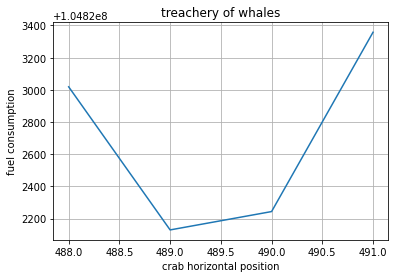

In [94]:
startend = np.arange(puzzle_input7_mean-1, puzzle_input7_mean+3)
plt.plot(
    startend,
    [sum_range(1, np.abs(puzzle_input7 - _)).sum() for _ in startend])
plt.grid()
plt.title('treachery of whales')
plt.xlabel('crab horizontal position')
plt.ylabel('fuel consumption')
plt.savefig('whales.png')

In [95]:
# DEMO: same range as plot
[sum_range(1, np.abs(puzzle_input7 - _)).sum() for _ in startend]

[104823019.0, 104822130.0, 104822244.0, 104823358.0]

In [96]:
answer = sum_range(1, np.abs(puzzle_input7 - puzzle_input7_mean)).sum()
answer

104822130.0

In [97]:
# check answer is 104822130
assert answer == 104822130

# day 8 part 1
Seven Segment Search

In [98]:
with (AOC_DIR / 'puzzle_input8.txt').open() as f:
  puzzle_input8 = [[_.split() for _ in line.split('|')] for line in f]
puzzle_input8[0]

[['bg',
  'gcdaeb',
  'aebg',
  'efabdcg',
  'abdce',
  'cafdbe',
  'fcbdeg',
  'bdacg',
  'gbd',
  'cafgd'],
 ['daecb', 'dcbae', 'gb', 'eabg']]

In [99]:
notes, output_values = list(zip(*puzzle_input8))
output_values[0]

['daecb', 'dcbae', 'gb', 'eabg']

In [100]:
UNIQUE_SEGMENTS = {2: 1, 4: 4, 3: 7, 7: 8}

In [101]:
def count_unique_digits(output_values):
  digits_count = 0
  for output_value in output_values:
    output_value_counts = [len(_) for _ in output_value]
    for test in UNIQUE_SEGMENTS:
      digits_count += output_value_counts.count(test)
  return digits_count


answer = count_unique_digits(output_values)
assert answer == 383
answer

383

In [102]:
example_input8_str = """be cfbegad cbdgef fgaecd cgeb fdcge agebfd fecdb fabcd edb | fdgacbe cefdb cefbgd gcbe
edbfga begcd cbg gc gcadebf fbgde acbgfd abcde gfcbed gfec | fcgedb cgb dgebacf gc
fgaebd cg bdaec gdafb agbcfd gdcbef bgcad gfac gcb cdgabef | cg cg fdcagb cbg
fbegcd cbd adcefb dageb afcb bc aefdc ecdab fgdeca fcdbega | efabcd cedba gadfec cb
aecbfdg fbg gf bafeg dbefa fcge gcbea fcaegb dgceab fcbdga | gecf egdcabf bgf bfgea
fgeab ca afcebg bdacfeg cfaedg gcfdb baec bfadeg bafgc acf | gebdcfa ecba ca fadegcb
dbcfg fgd bdegcaf fgec aegbdf ecdfab fbedc dacgb gdcebf gf | cefg dcbef fcge gbcadfe
bdfegc cbegaf gecbf dfcage bdacg ed bedf ced adcbefg gebcd | ed bcgafe cdgba cbgef
egadfb cdbfeg cegd fecab cgb gbdefca cg fgcdab egfdb bfceg | gbdfcae bgc cg cgb
gcafb gcf dcaebfg ecagb gf abcdeg gaef cafbge fdbac fegbdc | fgae cfgab fg bagce"""
example_input8 = [
  [_.split() for _ in line.split('|')] for line in example_input8_str.split('\n')]
example_notes, example_output_values = list(zip(*example_input8))
count_unique_digits(example_output_values)

26

# Day 8 part 2

In [103]:
example_notes[0]

['be',
 'cfbegad',
 'cbdgef',
 'fgaecd',
 'cgeb',
 'fdcge',
 'agebfd',
 'fecdb',
 'fabcd',
 'edb']

In [104]:
# find easy digits
example_digits = {}
example_segments = {}
for test in example_notes[0]:
  num_segments = len(test)
  if num_segments in UNIQUE_SEGMENTS:
    example_digits[test] = UNIQUE_SEGMENTS[num_segments]
    example_segments[UNIQUE_SEGMENTS[num_segments]] = set(test)

# use 1 and 7 to find top segment
top_segment = example_segments[7] - example_segments[1]
print(f"top segment: {''.join(top_segment)}")

# find the number 3
middle_segments = ''
for test in example_notes[0]:
  num_segments = len(test)
  if (num_segments == 5) and (example_segments[1] < set(test)):
    example_digits[test] = 3
    example_segments[3] = set(test)
    middle_segments = set(test) - example_segments[1]
    print(f"middle segments: {''.join(middle_segments)}")
    break

# find 2 or 5
two_or_five = ''
two = ''  # segment on bottom left
five = ''  # segment on top left
six_or_nine = ''
six = ''  # segment on bottom right
nine = ''  # segment on top right
for test in example_notes[0]:
  num_segments = len(test)
  if num_segments == 5:
    two_or_five = set(test) - middle_segments - example_segments[1]
    six_or_nine = set(test) - middle_segments - two_or_five
    if two_or_five:
      # use 4 to determine if two or five
      # b/c 4 shares top left with 5
      if two_or_five < example_segments[4]:  # five
        example_digits[test] = 5
        example_segments[5] = set(test)
        five = ''.join(two_or_five)
        print(f"top left (five): {five}")
        six = ''.join(six_or_nine)
        print(f"bottom right (six): {six}")
      else:  # two
        example_digits[test] = 2
        example_segments[2] = set(test)
        two = ''.join(two_or_five)
        print(f"bottom left (two): {two}")
        nine = ''.join(six_or_nine)
        print(f"top right (nine): {nine}")

middle_segment = example_segments[4] - set(two) - example_segments[1]
print(f"middle segment: {''.join(middle_segment)}")
bottom_segment = middle_segments - top_segment - middle_segment
print(f"bottom segment: {''.join(bottom_segment)}")
zero = {two, five} | bottom_segment | top_segment | example_segments[1]
print(f"zero: {''.join(zero)}")
nine = {five} | middle_segments | example_segments[1]
print(f"nine: {''.join(nine)}")
six = {two, five, six} | middle_segments
print(f"six: {''.join(six)}")

# this last part is a sanity check
for test in example_notes[0]:
  num_segments = len(test)
  if num_segments == 6:
    if set(test) == zero:
      example_digits[test] = 0
      example_segments[0] = set(test)
      print(f"zero: {''.join(zero)}")
    elif set(test) == nine:
      example_digits[test] = 9
      example_segments[9] = set(test)
      print(f"nine: {''.join(nine)}")
    elif set(test) == six:
      example_digits[test] = 6
      example_segments[6] = set(test)
      print(f"six: {''.join(six)}")

top segment: d
middle segments: fcd
top left (five): g
bottom right (six): e
bottom left (two): a
top right (nine): b
middle segment: gc
bottom segment: f
zero: ebfagd
nine: cbfegd
six: cfagde
nine: cbfegd
six: cfagde
zero: ebfagd


In [105]:
example_digits

{'agebfd': 0,
 'be': 1,
 'cbdgef': 9,
 'cfbegad': 8,
 'cgeb': 4,
 'edb': 7,
 'fabcd': 2,
 'fdcge': 5,
 'fecdb': 3,
 'fgaecd': 6}

In [106]:
example_segments

{0: {'a', 'b', 'd', 'e', 'f', 'g'},
 1: {'b', 'e'},
 2: {'a', 'b', 'c', 'd', 'f'},
 3: {'b', 'c', 'd', 'e', 'f'},
 4: {'b', 'c', 'e', 'g'},
 5: {'c', 'd', 'e', 'f', 'g'},
 6: {'a', 'c', 'd', 'e', 'f', 'g'},
 7: {'b', 'd', 'e'},
 8: {'a', 'b', 'c', 'd', 'e', 'f', 'g'},
 9: {'b', 'c', 'd', 'e', 'f', 'g'}}

In [107]:
def analyze_digits(notes):
  # find easy digits
  digits = {}
  segments = {}
  for test in notes:
    num_segments = len(test)
    if num_segments in UNIQUE_SEGMENTS:
      digits[test] = UNIQUE_SEGMENTS[num_segments]
      segments[UNIQUE_SEGMENTS[num_segments]] = set(test)

  # use 1 and 7 to find top segment
  top_segment = segments[7] - segments[1]

  # find the number 3
  middle_segments = ''
  for test in notes:
    num_segments = len(test)
    if (num_segments == 5) and (segments[1] < set(test)):
      digits[test] = 3
      segments[3] = set(test)
      middle_segments = set(test) - segments[1]
      break

  # find 2 or 5
  two_or_five = ''
  two = ''  # segment on bottom left
  five = ''  # segment on top left
  six_or_nine = ''
  six = ''  # segment on bottom right
  nine = ''  # segment on top right
  for test in notes:
    num_segments = len(test)
    if num_segments == 5:
      two_or_five = set(test) - middle_segments - segments[1]
      six_or_nine = set(test) - middle_segments - two_or_five
      if two_or_five:
        # use 4 to determine if two or five
        # b/c 4 shares top left with 5
        if two_or_five < segments[4]:  # five
          digits[test] = 5
          segments[5] = set(test)
          five = ''.join(two_or_five)
          six = ''.join(six_or_nine)
        else:  # two
          digits[test] = 2
          segments[2] = set(test)
          two = ''.join(two_or_five)
          nine = ''.join(six_or_nine)

  middle_segment = segments[4] - set(two) - segments[1]
  bottom_segment = middle_segments - top_segment - middle_segment
  zero = {two, five} | bottom_segment | top_segment | segments[1]
  nine = {five} | middle_segments | segments[1]
  six = {two, five, six} | middle_segments

  # this last part is a sanity check
  for test in notes:
    num_segments = len(test)
    if num_segments == 6:
      if set(test) == zero:
        digits[test] = 0
        segments[0] = set(test)
      elif set(test) == nine:
        digits[test] = 9
        segments[9] = set(test)
      elif set(test) == six:
        digits[test] = 6
        segments[6] = set(test)
  return digits, segments

In [108]:
digits, segments = analyze_digits(example_notes[0])
assert digits == example_digits
assert segments == example_segments

In [109]:
example_note = """acedgfb cdfbe gcdfa fbcad dab cefabd cdfgeb eafb cagedb ab""".split()
digits, segments = analyze_digits(example_note)
assert {"acedgfb": 8,
 "cdfbe": 5,
 "gcdfa": 2,
 "fbcad": 3,
 "dab": 7,
 "cefabd": 9,
 "cdfgeb": 6,
 "eafb": 4,
 "cagedb": 0,
 "ab": 1} == digits

In [110]:
signal_pattern_test = "cdfeb fcadb cdfeb cdbaf".split()

In [111]:
def decode_signal(signal, segments):
  decoded_signal = []
  for s in signal:
    for d in range(10):
      if segments[d] == set(s):
        decoded_signal.append(d)
  return int(''.join(str(d) for d in decoded_signal))

test_output = decode_signal(signal_pattern_test, segments)
assert test_output == 5353
test_output

5353

In [112]:
EXPECTED_OUTPUT = [int(o) for o in """8394
9781
1197
9361
4873
8418
4548
1625
8717
4315""".split()]

test_output = []
for test_data, output in zip(example_notes, example_output_values):
  digits, segments = analyze_digits(test_data)
  test_output.append(decode_signal(output, segments))
assert test_output == EXPECTED_OUTPUT
test_output

[8394, 9781, 1197, 9361, 4873, 8418, 4548, 1625, 8717, 4315]

In [113]:
output = []
for data, signal in puzzle_input8:
  digits, segments = analyze_digits(data)
  output.append(decode_signal(signal, segments))
sum(output)

998900

In [114]:
# check answer is correct
assert sum(output) == 998900

# Day 9 part 1
Lava tubes

In [115]:
EXAMPLE9 = """2199943210
3987894921
9856789892
8767896789
9899965678""".split()
EXAMPLE9 = np.array(
    [[pos for pos in row] for row in EXAMPLE9], int)
EXPECTED_LOW_PTS = [1, 0, 5, 5]
EXPECTED_RISK = sum(pt+1 for pt in EXPECTED_LOW_PTS)
EXPECTED_RISK

15

In [116]:
EXAMPLE9

array([[2, 1, 9, 9, 9, 4, 3, 2, 1, 0],
       [3, 9, 8, 7, 8, 9, 4, 9, 2, 1],
       [9, 8, 5, 6, 7, 8, 9, 8, 9, 2],
       [8, 7, 6, 7, 8, 9, 6, 7, 8, 9],
       [9, 8, 9, 9, 9, 6, 5, 6, 7, 8]])

In [140]:
def local_minima(heightmap):
    """https://stackoverflow.com/a/3986476/1020470"""
    array2d = np.pad(heightmap, 1, mode='constant', constant_values=9)
    loc_min = ((array2d <= np.roll(array2d,  1, 0)) &
        (array2d <= np.roll(array2d, -1, 0)) &
        (array2d <= np.roll(array2d,  1, 1)) &
        (array2d <= np.roll(array2d, -1, 1)))
    return loc_min[1:-1, 1:-1] & (heightmap != 9)


EXAMPLE9[local_minima(EXAMPLE9)]

array([1, 0, 5, 5])

In [117]:
def find_low_pts(heightmap):
  """heightmap is a 2d numpy array"""
  # left to right
  dx = np.pad(np.sign(np.diff(heightmap, axis=1)), [(0, 0), (0, 1)])
  dx2 = np.pad(np.diff(dx, axis=1), [(0, 0), (1, 0)])
  # top to bottom
  dy = np.pad(np.sign(np.diff(heightmap, axis=0)), [(0, 1), (0, 0)])
  dy2 = np.pad(np.diff(dy, axis=0), [(1, 0), (0, 0)])
  # right to left
  dx_rev = np.pad(np.sign(-np.diff(heightmap, axis=1)), [(0, 0), (1, 0)])
  dx2_rev = np.pad(-np.diff(dx_rev, axis=1), [(0, 0), (0, 1)])
  # bottom to top
  dy_rev = np.pad(np.sign(-np.diff(heightmap, axis=0)), [(1, 0), (0, 0)])
  dy2_rev = np.pad(-np.diff(dy_rev, axis=0), [(0, 1), (0, 0)])
  # find minima
  dydx = dx2 + dy2 + dx2_rev + dy2_rev
  # any local minima in the middle will be eight (8)
  minima = dydx == 8
  # check edges, local minima will be five (5)
  minima[0, :] = (dydx[0, :] == 5)
  minima[-1, :] = (dydx[-1, :] == 5)
  minima[:, 0] = (dydx[:, 0] == 5)
  minima[:, -1] = (dydx[:, -1] == 5)
  # check corners, local minima will be two (2)
  minima[0, 0] = (dydx[0, 0] == 2)
  minima[0, -1] = (dydx[0, -1] == 2)
  minima[-1, 0] = (dydx[-1, 0] == 2)
  minima[-1, -1] = (dydx[-1, -1] == 2)
  return heightmap[minima]


example_low_pts = find_low_pts(EXAMPLE9)
assert np.all(example_low_pts == EXPECTED_LOW_PTS)
assert np.sum(example_low_pts+1) == EXPECTED_RISK

In [118]:
with (AOC_DIR / 'puzzle_input9.txt').open() as f:
  puzzle_input9 = np.array(
    [[pos for pos in row.strip()] for row in f], int)
puzzle_input9[:10, :10]

array([[4, 5, 6, 7, 8, 9, 4, 3, 0, 1],
       [3, 4, 5, 8, 9, 6, 3, 2, 1, 2],
       [2, 3, 4, 8, 9, 5, 4, 3, 2, 9],
       [1, 2, 3, 7, 8, 9, 5, 4, 9, 8],
       [3, 4, 5, 6, 7, 9, 7, 9, 8, 7],
       [4, 5, 6, 7, 9, 8, 9, 8, 9, 6],
       [5, 6, 7, 9, 8, 7, 8, 7, 8, 9],
       [8, 7, 9, 8, 7, 6, 5, 6, 7, 8],
       [9, 9, 8, 7, 6, 5, 4, 6, 8, 8],
       [2, 3, 9, 8, 5, 4, 3, 5, 6, 7]])

In [119]:
find_low_pts(puzzle_input9[:10, :10])

array([0, 1, 6, 2, 3])

In [120]:
low_pts = find_low_pts(puzzle_input9)
risk = np.sum(low_pts+1)
risk

425

In [121]:
# check answer is 425
assert risk == 425

In [141]:
# try the stack overflow solution
so_solution = puzzle_input9[local_minima(puzzle_input9)]
sum(so_solution+1)

425

# Day 9 part 2